In [1]:
class NMS:
    '''
    参考论文：Neubeck A, Van Gool L. Efficient Non-Maximum Suppression

    非极大值抑制
    '''

    def __init__(self, I):
        '''
        参数
        ===========
        I::1D 或者 2D 数组
        '''
        self.I = I
        self.__pmax = deepcopy(self.I)

    def __CompPartialMax(self, from_, to):
        '''
        Compute Partial Maximum

        返回
        =========
        max{self.I[from_:to+1]}
        '''
        best = to
        # 从右往左搜索
        while to > from_:
            to -= 1
            if self.I[to] <= self.I[best]:
                self.__pmax[to] = self.I[best]
            else:
                self.__pmax[to] = self.I[to]
                best = to
        return best

    def BlockWise(self, r):
        '''
        r 近邻，即 (2r+1)-Neighborhood
        '''
        w = len(self.I)
        assert 3 * r < w, "邻域半径超出范围"
        i = r
        self.__CompPartialMax(0, i - 1)
        chkpt = -1
        maximuns = []

        while i + 2 * r < w:
            j = self.__CompPartialMax(i, i + r)
            k = self.__CompPartialMax(i + r + 1, j + r)
            if i == j or self.I[j] > self.I[k]:  # self.I[j] 是极大值
                if (chkpt < j - r or self.I[j] >= self.__pmax[chkpt]) and (
                        j - r == i or self.I[j] >= self.__pmax[j - r]):
                    maximuns.append(j)
                if i < j:
                    chkpt = i + r + 1
                i = j + r + 1
            else:
                i = k
                chkpt = j + r + 1
                while i < w - r:
                    j = self.__CompPartialMax(chkpt, i + r)
                    if self.I[i] > self.I[j]:  # # self.I[i] 是极大值
                        maximuns.append(i)
                        i = i + r - 1
                        break
                    else:
                        chkpt = i + r - 1
                        i = j
        return maximuns, self.__pmax

In [3]:
import numpy as np
from copy import  deepcopy
from matplotlib import pyplot as plt
np.set_printoptions(2)     # 修改了 NumPy 的打印精度
# 指定默认字体, 为在 Matplotlib 中显示中文，设置特殊字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号 '-' 显示为方块的问题

%matplotlib inline

img_name = '../images/catdog.jpg'
img = plt.imread(img_name)[:,:,0]

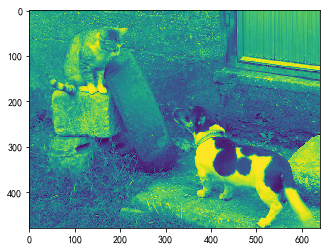

In [5]:
plt.imshow(img)

In [34]:
h, w = img.shape
r = 10

epochs = int((min(w, h) - r) / (1+r))

In [37]:
min(h, w)

479

False

In [61]:
i, j = r, r
K = np.zeros_like(img)
t = 1
while i < w-r and j < h-r:
    if img[i,j] > img[i+1:i+r,j+1:j+r].max():
        K[i+1:i+r,j+1:j+r] = img[i,j]
        print(K[i+1:i+r,j+1:j+r])
    while i <= m or j <= t*(1 + r):
        if 
        
    i += 1 + r
    j += 1 + r

[[193 193 193 193 193 193 193 193 193]
 [193 193 193 193 193 193 193 193 193]
 [193 193 193 193 193 193 193 193 193]
 [193 193 193 193 193 193 193 193 193]
 [193 193 193 193 193 193 193 193 193]
 [193 193 193 193 193 193 193 193 193]
 [193 193 193 193 193 193 193 193 193]
 [193 193 193 193 193 193 193 193 193]
 [193 193 193 193 193 193 193 193 193]]
[[132 132 132 132 132 132 132 132 132]
 [132 132 132 132 132 132 132 132 132]
 [132 132 132 132 132 132 132 132 132]
 [132 132 132 132 132 132 132 132 132]
 [132 132 132 132 132 132 132 132 132]
 [132 132 132 132 132 132 132 132 132]
 [132 132 132 132 132 132 132 132 132]
 [132 132 132 132 132 132 132 132 132]
 [132 132 132 132 132 132 132 132 132]]
[[178 178 178 178 178 178 178 178 178]
 [178 178 178 178 178 178 178 178 178]
 [178 178 178 178 178 178 178 178 178]
 [178 178 178 178 178 178 178 178 178]
 [178 178 178 178 178 178 178 178 178]
 [178 178 178 178 178 178 178 178 178]
 [178 178 178 178 178 178 178 178 178]
 [178 178 178 178 178 1

In [60]:
K

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
def img2seq(I):
    K = I.flatten()
    nms = NMS(K)
    maximumat = nms.BlockWise(2)
    K[maximumat] = 0
    img = K.reshape(I.shape)  # 去除极大值点后组成的图像
    return img

img1 = img[:,:,0]
img2 = img[:,:,0] - img1   # 极大值点组成的图像

plt.figure(figsize=(10, 10))
plt.subplot(131)
plt.imshow(img)
plt.title('原图')
plt.axis('off')
plt.subplot(132)
plt.imshow(img1)
plt.title('去除极大值点图')
plt.axis('off')
plt.subplot(133)
plt.imshow(img2)
plt.title('极大值点图')
plt.axis('off')
plt.show()

In [ ]:
img2